<a href="https://colab.research.google.com/github/chanlee4345/invest/blob/main/bt_%EC%82%AC%EA%B3%84%EC%A0%88_%ED%8F%AC%ED%8A%B8%ED%8F%B4%EB%A6%AC%EC%98%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bt
!pip install finterstellar
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.7 MB 8.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for bt: filename=bt-0.2.9-cp37-cp37m-linux_x86_64.whl size=765279 sha256=3d5c213c0cdde6d757e40ed9be62e3e94839aa8f71472afc80bbe8973f76ef58
  Stored in directory: /root/.cache/pip/wheels/c5/1a/3f/b56e6064b766c107f25e200969161c09ca6868cbfe0eaa31e4
Successfully built bt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 8.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels

In [ ]:
import bt
import finterstellar as fs
import quantstats as qs
import pandas as pd
%matplotlib inline

In [ ]:
U = ['SPY','IEF','TLT','GLD','DBC']
initial_capital = 100000.0

In [ ]:
df = pd.DataFrame()
for ticker in U:
  df[ticker] = fs.get_ohlc(ticker, start_date='2001-01-01')['Adj Close']

In [ ]:
df = df.dropna()

In [ ]:
df

,SPY,IEF,TLT,GLD,DBC
Date,,,,,
2006-02-06,91.71,55.46,55.36,56.72,22.05
2006-02-07,90.90,55.39,55.10,54.60,21.41
2006-02-08,91.72,55.36,54.97,54.83,21.32
2006-02-09,91.57,55.41,55.22,56.18,21.52
2006-02-10,91.74,55.25,54.92,54.79,21.13
...,...,...,...,...,...
2022-06-27,388.59,100.43,111.38,169.90,27.64
2022-06-28,380.65,100.56,111.90,169.62,27.97
2022-06-29,380.34,101.37,113.64,169.49,27.49


In [ ]:
s = bt.Strategy('all_season',
                [bt.algos.RunYearly(run_on_first_date=False,
                                     run_on_end_of_period=True,
                                     run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighSpecified(SPY=0.3,IEF=0.15,TLT=0.4,GLD=0.075,DBC=0.075),
                 bt.algos.Rebalance(),
                 ])
bt1 = bt.Backtest(s, df, initial_capital=initial_capital)

In [ ]:
def buy_and_hold(data, name='buy_and_hold'):
  s = bt.Strategy(name, [bt.algos.RunOnce(),
                         bt.algos.SelectAll(),
                         bt.algos.WeighEqually(),
                         bt.algos.Rebalance()])
  return bt.Backtest(s, data, initial_capital=initial_capital)

In [ ]:
SPY = buy_and_hold(df['SPY'].to_frame(), name='SPY')

In [ ]:
res = bt.run(bt1, SPY)

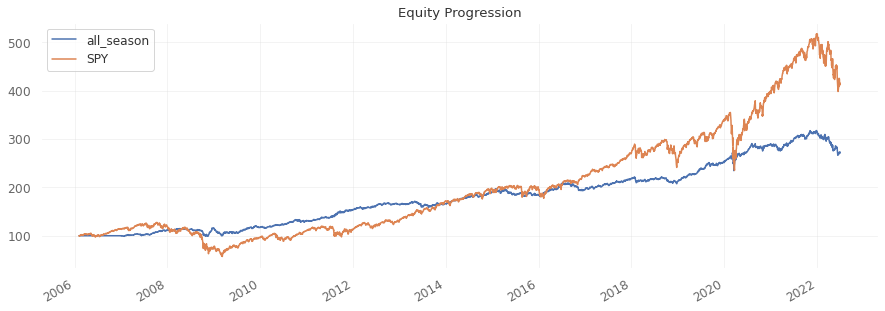

In [ ]:
res.plot()

In [ ]:
res.display()

Stat                 all_season    SPY
-------------------  ------------  ----------
Start                2006-02-05    2006-02-05
End                  2022-07-01    2022-07-01
Risk-free rate       0.00%         0.00%

Total Return         173.32%       315.59%
Daily Sharpe         0.86          0.54
Daily Sortino        1.37          0.82
CAGR                 6.32%         9.07%
Max Drawdown         -16.08%       -55.17%
Calmar Ratio         0.39          0.16

MTD                  0.89%         1.06%
3m                   -9.84%        -15.46%
6m                   -13.55%       -19.13%
YTD                  -13.55%       -19.13%
1Y                   -8.41%        -10.17%
3Y (ann.)            4.79%         10.62%
5Y (ann.)            5.89%         11.43%
10Y (ann.)           5.34%         12.94%
Since Incep. (ann.)  6.32%         9.07%

Daily Sharpe         0.86          0.54
Daily Sortino        1.37          0.82
Daily Mean (ann.)    6.41%         10.68%
Daily Vol (ann.)     7.42%    

In [ ]:
res.display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ------
  2006   0      0      0      0      0      0      0      0      0      0      0      0       0
  2007   0      1.62  -0.4    1.99  -0.28  -1.01   0.95   1.37   2.77   2.51   1.28   0.54   11.85
  2008   0.56   0.56   0.23   0.05  -0.24   0.16  -1.41   0.37  -2.53  -8.35   6.46   8.26    3.23
  2009  -8.18  -4.23   4.56  -0.55   2.3   -0.54   3.16   1.8    2.71  -0.73   4.37  -2.68    1.2
  2010  -0.34   1.34   0.73   2.75  -0.47   1.5    1.51   3.06   2.08  -0.28  -0.69   0.79   12.59
  2011  -0.75   2.43   0.32   3.1    0.76  -2.02   2.58   3.91   2.02   1.58   0.97   1.07   17.01
  2012   2.51   0.32  -1.05   1.79   0.53   0.79   2.55   0.97   0.06  -1.34   0.88  -1.08    7.05
  2013   0.22   0.31   1.2    1.84  -2.85  -2.94   1.54  -1.27   1.08   2.28  -0.38  -0.13    0.74
  2014   1.95 

In [ ]:
res.prices['all_season']

2006-02-05   100.00
2006-02-06   100.00
2006-02-07   100.00
2006-02-08   100.00
2006-02-09   100.00
              ...  
2022-06-27   271.02
2022-06-28   270.26
2022-06-29   271.47
2022-06-30   270.92
2022-07-01   273.32
Name: all_season, Length: 4131, dtype: float64

[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2006-02-06  2006-02-06
End Period                 2022-07-01  2022-07-01
Risk-Free Rate             0.0%        0.0%
Time in Market             95.0%       100.0%

Cumulative Return          173.32%     315.59%
CAGR﹪                     6.32%       9.07%

Sharpe                     0.86        0.54
Prob. Sharpe Ratio         99.97%      98.47%
Smart Sharpe               0.84        0.52
Sortino                    1.22        0.75
Smart Sortino              1.19        0.73
Sortino/√2                 0.86        0.53
Smart Sortino/√2           0.84        0.52
Omega                      1.17        1.17

Max Drawdown               -16.08%     -55.17%
Longest DD Days            463         1772
Volatility (ann.)          7.42%       19.94%
R^2                        0.17        0.17
Information Ratio          -0.01       -0.01
Calmar       

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


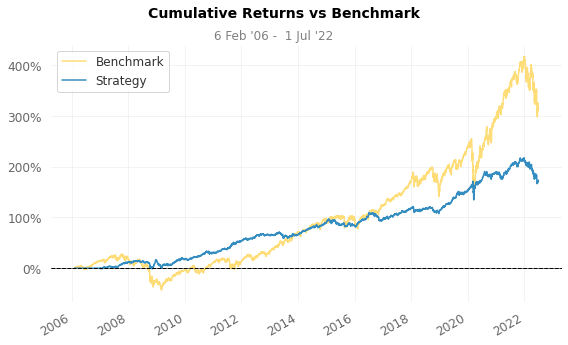

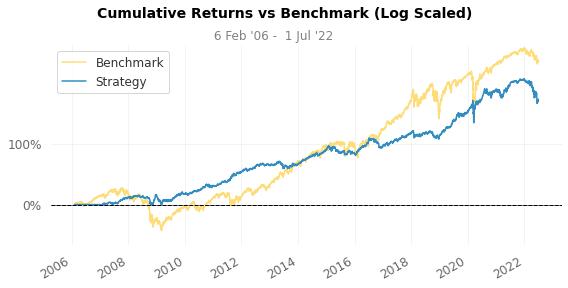

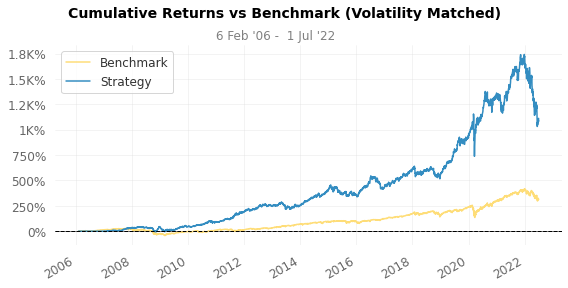

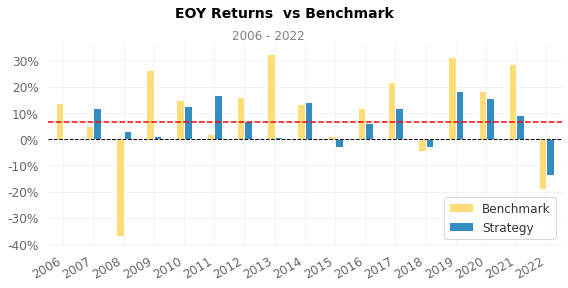

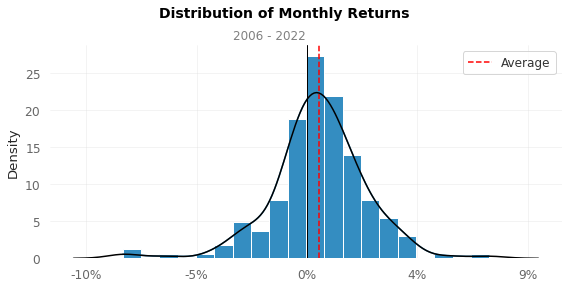

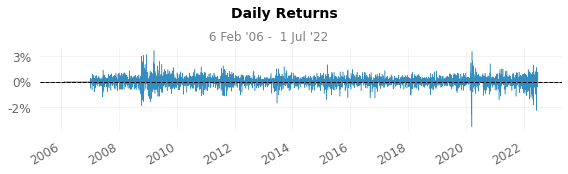

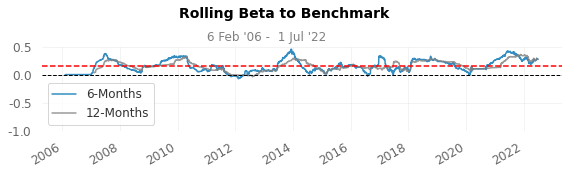

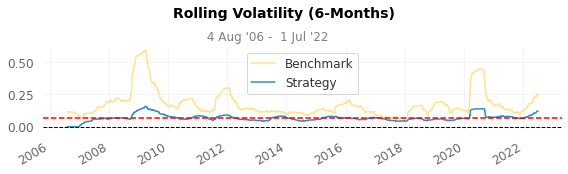

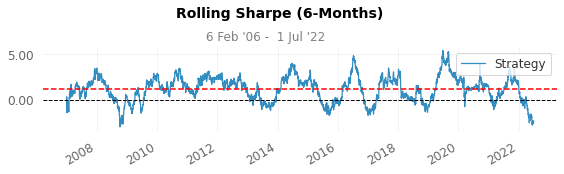

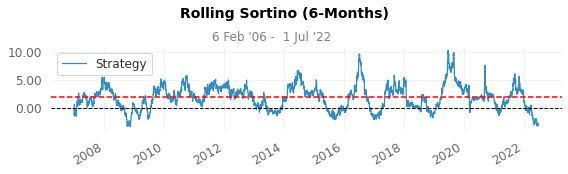

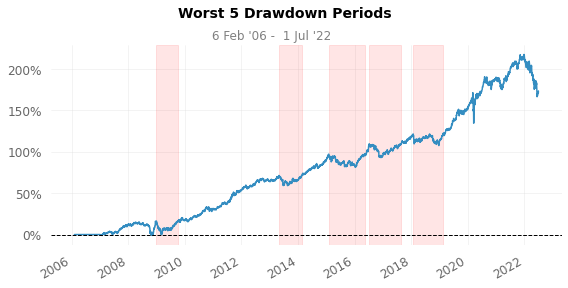

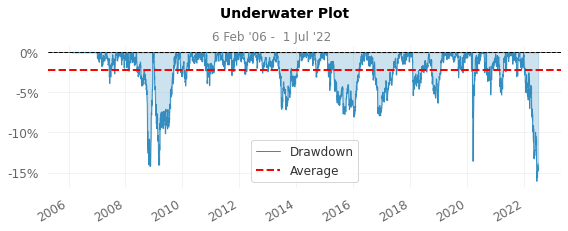

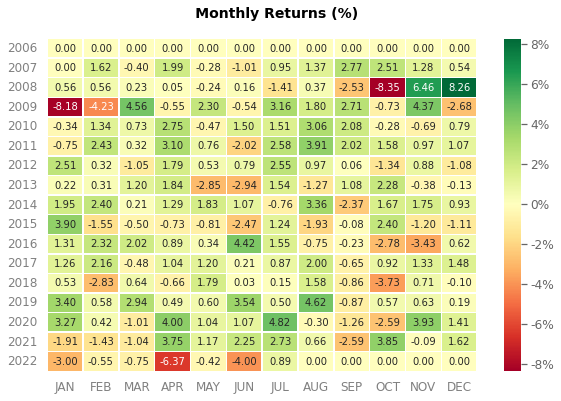

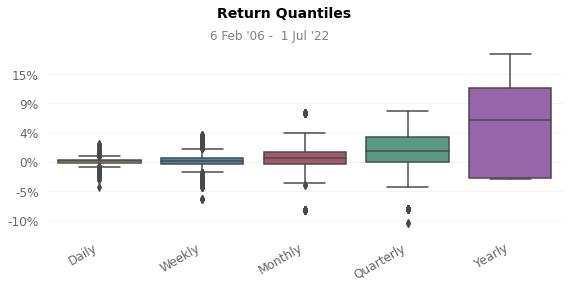

In [ ]:
qs.reports.full(res.prices['all_season'].to_returns().dropna(), res.prices['SPY'].to_returns().dropna())

In [ ]:
qs.reports.html(res.prices['all_season'].to_returns().dropna(), res.prices['SPY'].to_returns().dropna(),output="all_season_result.html")

In [ ]:
from google.colab import  drive
drive.mount('drive')

In [ ]:
drive.mount('drive')

Mounted at drive


In [ ]:
res.prices

,all_season,SPY
2006-02-05,100.00,100.00
2006-02-06,100.00,100.00
2006-02-07,100.00,99.12
2006-02-08,100.00,100.02
2006-02-09,100.00,99.85
...,...,...
2022-06-27,271.02,423.60
2022-06-28,270.26,414.95
2022-06-29,271.47,414.61
2022-06-30,270.92,411.24


In [ ]:
res.prices.to_csv('all_season.csv')

In [ ]:
!cp all_season.csv 'drive/MyDrive/Colab Notebooks/all_season.csv'

In [ ]:
res.prices

,all_season,SPY
2006-02-05,100.00,100.00
2006-02-06,100.00,100.00
2006-02-07,100.00,99.12
2006-02-08,100.00,100.02
2006-02-09,100.00,99.85
...,...,...
2022-06-27,271.02,423.60
2022-06-28,270.26,414.95
2022-06-29,271.47,414.61
2022-06-30,270.92,411.24
